Why 1.5? Because I'm not addressing the issues I promised (yet) and instead present a small improvement on removing the thick outlines.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# a little helper function to display our image in a bigger plot
def display_img(image):
    fig = plt.figure(figsize=(20,16))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap="gray")

# and to remove the black pixels -- there has to be a built-in openCV method for that which I'm not aware of yet
def remove_black(dest_img, source_img):
    for i, v in enumerate(dest_img):
        for ii, vi in enumerate(v):
            if source_img[i][ii] == 0:
                dest_img[i][ii] = 255
    return dest_img

In [2]:
img = cv2.imread('obfuscated.jpg', 0) #read in as a grayscale image

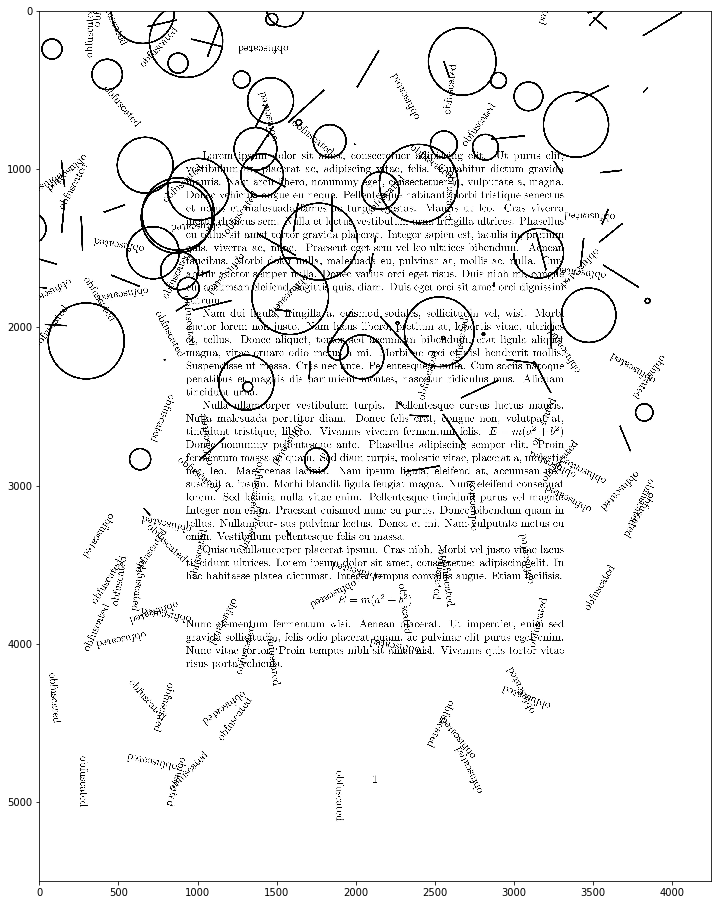

In [32]:
display_img(img)

Note that in the previous post I found out that a naive removal method and the Hough transform worked better than the Suzuki algorithm for contour location. The method I'm about to present should work regardless of the methods applied previously to the image, but it comes at a price. Let's say I go with the naive method:

In [12]:
img_med = cv2.medianBlur(img, ksize=15)

In [34]:
ret, th = cv2.threshold(img_med, 80, 255, cv2.THRESH_BINARY)

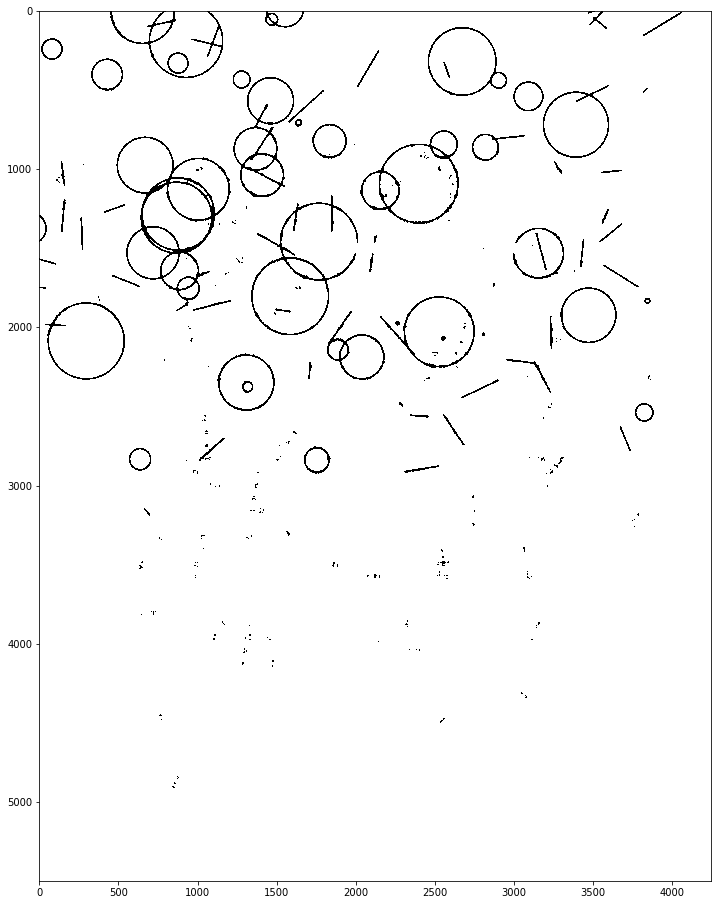

In [35]:
display_img(th)

The secret here is to erode the image using a wide enough kernel (3x3 in our case). Normally [erosion](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) would make the outlines thinner, but because we're working with a white background and black foreground it actually makes the outlines thicker. (Which is something we need since by first blurring and thresholding the image to extract the contours we have "watered down" the outlines significantly, leaving some of their traces behind after switching their pixels from black to white.)

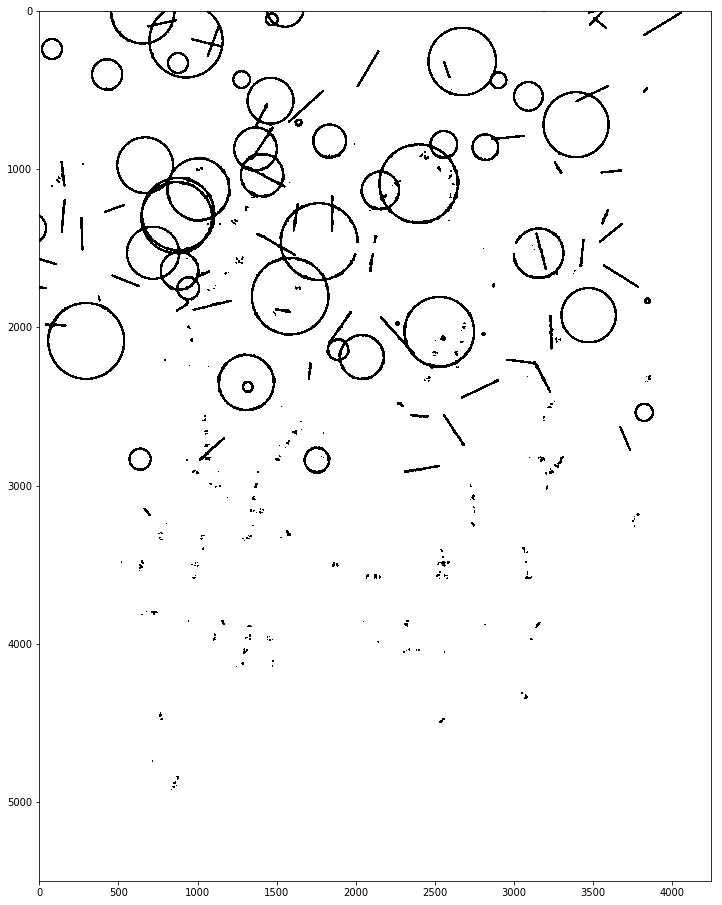

In [65]:
kernel = np.ones((3,3),np.uint8)
eroded_img = cv2.erode(th,kernel,iterations=2)
display_img(eroded_img)

In [66]:
img_dest = img.copy()
img_dest = remove_black(img_dest, eroded_img)

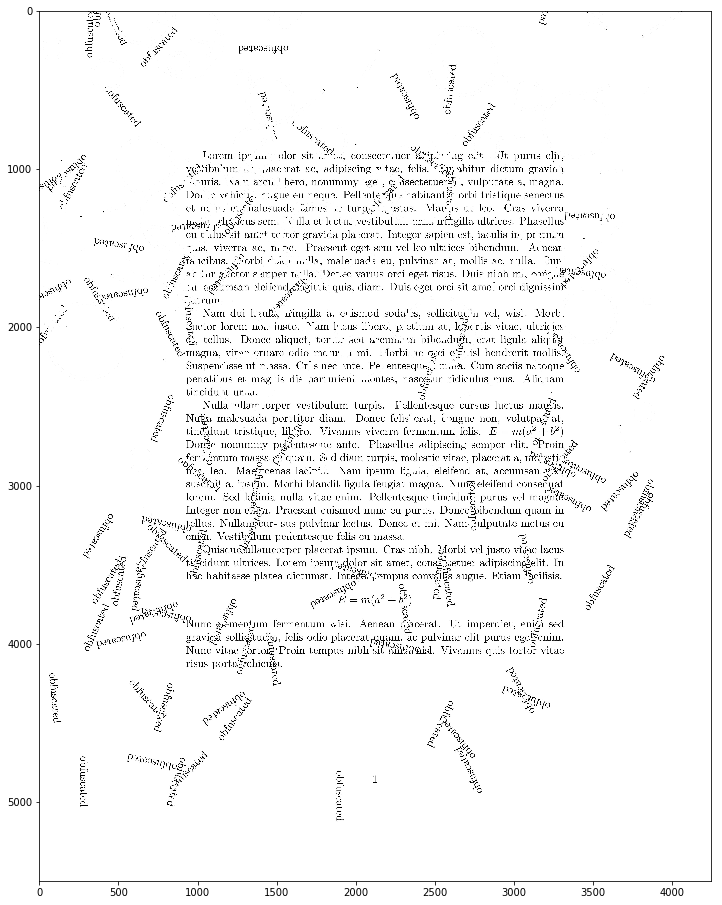

In [67]:
display_img(img_dest)

And voilà! The geometric outlines are by and large gone. Unfortunately, this removes some of the letters as well (since they were covered by the outlines) but you can't have everything ¯\_(ツ)_/¯